In [73]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### TRAIN
        the train set, containing the user ids and whether they have churned.
        Churn is defined as whether the user did not continue the subscription within 30 days of expiration. 
        is_churn = 1 means churn,
        is_churn = 0 means renewal.

In [2]:
train_input = pd.read_csv('/home/dissertation/data/train_v2.csv', 
                          dtype = {'msno' : 'category'})
train_input.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [3]:
## The percentage of churners is?
print("The percentage of churners is: {0:.4f}".format(np.mean(train_input.is_churn)))
train_input.is_churn.value_counts()

The percentage of churners is: 0.0899


0    883630
1     87330
Name: is_churn, dtype: int64

 0    883630
1     87330
Name: is_churn, dtype: int64


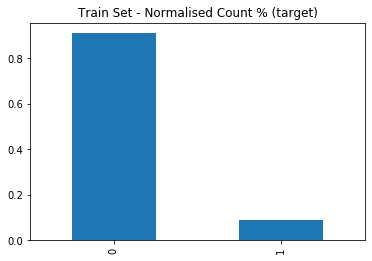

In [4]:
train_input.is_churn.value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalised Count % (target)')
print("",train_input.is_churn.value_counts())

So we have churn records for 970960 members

### MEMBERS

In [29]:
members_input = pd.read_csv('/home/dissertation/data/members_v3.csv', parse_dates=[5],
                            dtype={'registered_via' : np.uint8,
                                   'gender' : str,
                                   'city' : str,
                                   'registered_via' : str})

In [30]:
## Reduce members down to those which exist in the dataset
members_input = pd.merge(left=train_input['msno'], right=members_input, how='inner', on=['msno'])
members_input.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,5,28,male,3,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,13,20,male,3,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,13,18,male,3,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,0,NaN,7,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,13,35,female,7,2014-01-25


In [31]:
members_input.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,5,28,male,3,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,13,20,male,3,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,13,18,male,3,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,0,NaN,7,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,13,35,female,7,2014-01-25


#### Adding a membership_months feature

In [33]:
## Adding in a member for time period
## Max transation date will be used as end period. That date is: 2017-02-28

members_input['membership_months'] = (pd.datetime(2017,2, 28) - members_input['registration_init_time']) / np.timedelta64(1, 'M')
members_input['membership_months'] = members_input['membership_months'].astype(int)

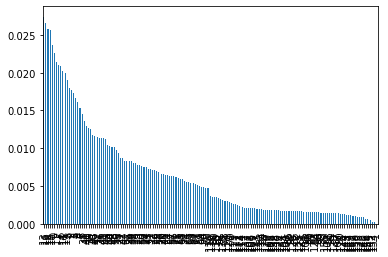

In [39]:
members_input['membership_months'].value_counts(normalize=True).plot(kind='bar')

#### Mapping all missing gender to 'unknown' category

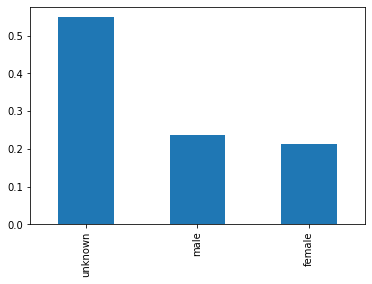

In [34]:
members_input['gender'] = members_input['gender'].fillna(value='unknown')
members_input.gender.value_counts(normalize=True).plot(kind='bar')

#### Map outliers in BD

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d29248b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d29248f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d292486d8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d292738d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d29273c18>],
 'means': []}

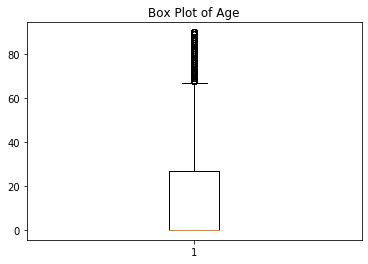

In [35]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.boxplot(members_input[members_input.bd.between(0,90)]['bd'])

In [40]:
#Everything below 0 and above 90 is junk 
members_input = members_input[members_input.bd.between(0,90)]

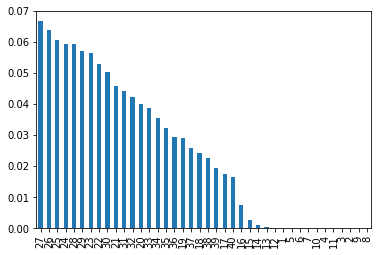

In [41]:
members_input[members_input.bd.between(1,40)].bd.value_counts(normalize=True).plot(kind='bar')

In [42]:
members_input.describe(include='all')

,msno,city,bd,gender,registered_via,registration_init_time,membership_months
count,860333,860333,860333.00,860333,860333,860333,860333.00
unique,860333,21,nan,3,5,4749,nan
top,jS7mXQDlnot48OjPQGJvXVpqlDATm3mDWlQv+7YWOZo=,1,nan,unknown,7,2015-10-09 00:00:00,nan
freq,1,442554,nan,471984,462595,1574,nan
first,NaN,NaN,nan,NaN,NaN,2004-03-26 00:00:00,nan
last,NaN,NaN,nan,NaN,NaN,2017-04-24 00:00:00,nan
mean,NaN,NaN,13.43,NaN,NaN,NaN,41.02
std,NaN,NaN,16.01,NaN,NaN,NaN,36.06
min,NaN,NaN,0.00,NaN,NaN,NaN,-1.00
25%,NaN,NaN,0.00,NaN,NaN,NaN,13.00


    bd/age_cat is an issue. 
    gender is also an issue.

    It may be better to drop them or remove the poor instances.

#### Categorical Features

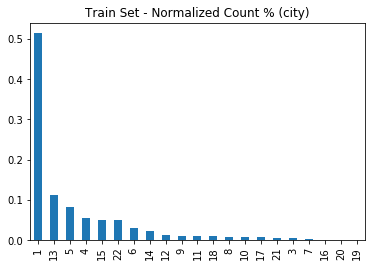

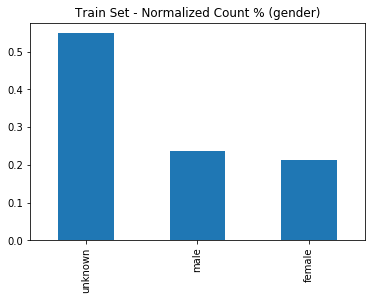

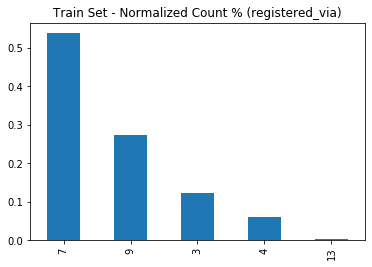

In [43]:
for idx, col in enumerate(['city','gender','registered_via']):
    plt.figure()
    members_input[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

#### Notes:
    msno: 6769473 members in total in the system.
    city [1] is by far the most active city in terms of memberships (~ 50%)
    A large portion (>60%) of gender information is missing
    There are 5 main approaches to registering, [9, 9, 3, 4, 13].

#### TRANSACTIONS

In [47]:
## Next load in the transactions data
transactions_input = pd.read_csv('/home/dissertation/data/transactions.csv',
                                 dtype = {'payment_method' : 'category',
                                          'payment_plan_days' : np.uint8,
                                          'plan_list_price' : np.uint8,
                                          'actual_amount_paid': np.uint8,
                                          'is_auto_renew' : np.bool,
                                          'is_cancel' : np.bool})
transactions_input.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,True,20150930,20151101,False
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,True,20150930,20151031,False
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,True,20150930,20160427,False
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,True,20150930,20151128,False
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,True,20150930,20151121,False


In [48]:
# Reduce the dataset down to the members in the train set only
transactions = pd.merge(train_input['msno'], transactions_input, on='msno', how='inner')
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,38,30,149,149,False,20170228,20170330,False
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150331,20150430,False
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150630,20150731,False
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,30,149,149,True,20150902,20150901,True
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150831,20150930,False


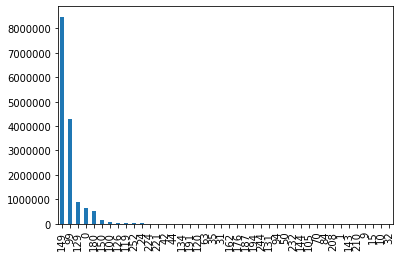

In [49]:
transactions.plan_list_price.value_counts().plot(kind='bar')

In [50]:
transactions_input.describe(include='all')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,21547746,21547746.00,21547746.00,21547746.00,21547746.00,21547746,21547746.00,21547746.00,21547746
unique,2363626,nan,nan,nan,nan,2,nan,nan,2
top,xm6fmAfgZx1OYUXaJuHOObD0H2EAtIktv9NYIVlaTf4=,nan,nan,nan,nan,True,nan,nan,False
freq,71,nan,nan,nan,nan,18357950,nan,nan,20690895
mean,NaN,38.93,30.15,127.05,128.65,NaN,20157597.16,20158624.78,NaN
std,NaN,3.51,18.30,42.32,39.57,NaN,6155.98,7755.75,NaN
min,NaN,1.00,0.00,0.00,0.00,NaN,20150101.00,19700101.00,NaN
25%,NaN,38.00,30.00,99.00,99.00,NaN,20150906.00,20151019.00,NaN
50%,NaN,41.00,30.00,149.00,149.00,NaN,20160321.00,20160430.00,NaN
75%,NaN,41.00,30.00,149.00,149.00,NaN,20160925.00,20161031.00,NaN


(array([1.1970e+06, 9.1000e+01, 5.0000e+01, 0.0000e+00, 4.4805e+04,
        6.0000e+00, 1.4370e+04, 0.0000e+00, 1.1274e+04, 1.0560e+03,
        0.0000e+00, 0.0000e+00, 1.2086e+04, 2.5000e+02, 0.0000e+00,
        0.0000e+00, 7.7000e+01, 3.0000e+00, 6.0600e+02, 4.9362e+06,
        3.7400e+02, 0.0000e+00, 0.0000e+00, 3.6003e+05, 5.9900e+02,
        1.2889e+06, 4.8070e+03, 0.0000e+00, 4.9400e+02, 1.2857e+07,
        0.0000e+00, 0.0000e+00, 5.1210e+03, 0.0000e+00, 5.5260e+03,
        6.8006e+05, 0.0000e+00, 5.2880e+03, 1.5010e+03, 0.0000e+00,
        0.0000e+00, 1.4800e+02, 0.0000e+00, 1.0847e+04, 2.3170e+04,
        0.0000e+00, 7.8300e+02, 1.3000e+01, 1.2110e+03, 8.3995e+04]),
 array([  0.  ,   5.04,  10.08,  15.12,  20.16,  25.2 ,  30.24,  35.28,
         40.32,  45.36,  50.4 ,  55.44,  60.48,  65.52,  70.56,  75.6 ,
         80.64,  85.68,  90.72,  95.76, 100.8 , 105.84, 110.88, 115.92,
        120.96, 126.  , 131.04, 136.08, 141.12, 146.16, 151.2 , 156.24,
        161.28, 166.32, 171.36

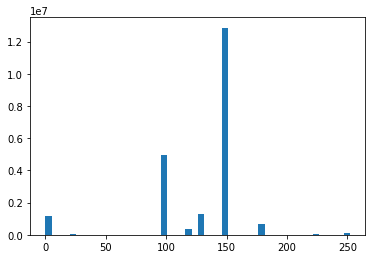

In [51]:
plt.hist(transactions_input.actual_amount_paid, bins=50)

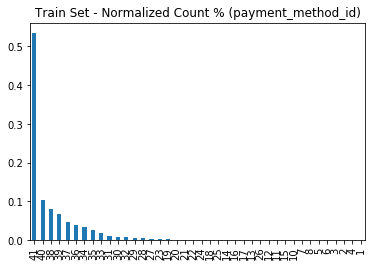

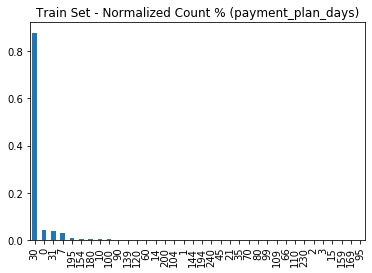

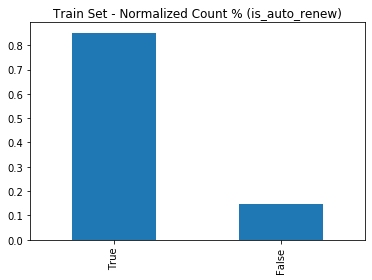

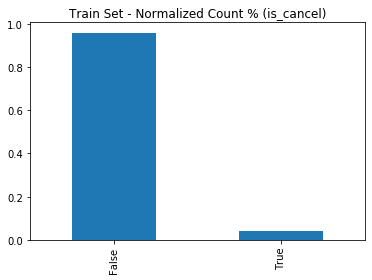

In [52]:
for idx, col in enumerate(['payment_method_id','payment_plan_days','is_auto_renew','is_cancel']):
    plt.figure()
    transactions_input[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

#### Notes:
    payment_method_id 41 accounts for >50% of all payment types
    Vast majority of transactions are for 30 day plans
    >85% of customers opt to auto_renew 
    >90% have not cancelled their subscription
    149.00 is the most common payment plan

### Merge the churn labels and the member data

In [56]:
merged_input = pd.merge(train_input, members_input, on='msno', how='inner')

is_churn,0,1
gender,,
female,0.19,0.03
male,0.21,0.03
unknown,0.51,0.04


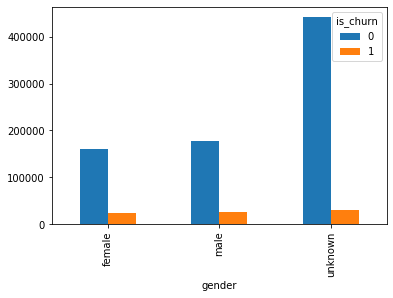

In [57]:
merged_input['gender'] = merged_input['gender'].astype(str)
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing')).plot(kind='bar')
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing'), normalize=True)

### Merging Transactions with those members involved in the churn study

In [58]:
transactions_merged = pd.merge(left = merged_input[['msno']], 
                               right = transactions, 
                               how='inner', 
                               on='msno')
transactions_merged.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,38,30,149,149,False,20170228,20170330,False
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150331,20150430,False
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150630,20150731,False
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,30,149,149,True,20150902,20150901,True
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150831,20150930,False


In [59]:
%%time
#[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\

transactions_merged[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\
        .groupby('msno')\
        .agg({'msno' : {'total_order' : 'count'},
                        'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0],
                                               'payment_method_id_count' : lambda x: len(np.unique(x))},
                        'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x[x>0].mode()[0],
                                               'payment_plan_days_mean' : 'mean'},
                        'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                             'plan_lifetime_value' : 'sum'},
                        'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                'total_actual_amount' : 'sum'},
                        'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0]},
                        'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                              'transaction_date_max' : lambda x: x.max()},
                        'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
            })

CPU times: user 1.02 s, sys: 240 ms, total: 1.26 s
Wall time: 815 ms


/home/anaconda/envs/py373/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


msno  \
                                             total_order   
msno                                                       
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=           6   

                                                  payment_method_id  \
                                             payment_method_id_mode   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                     31   

                                                                      \
                                             payment_method_id_count   
msno                                                                   
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                       2   

                                                  payment_plan_days  \
                                             payment_plan_days_mode   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                     30   

                                                                     \
                                             payment_plan_days_mean   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                     10   

                                                  plan_list_price  \
                                             plan_list_price_mean   
msno                                                                
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                49.67   

                                                                  \
                                             plan_lifetime_value   
msno                                                               
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=              298.00   

                                             actual_amount_paid  \
                                             actual_amount_mean   
msno                                                              
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                149   

                                                                  \
                                             total_actual_amount   
msno                                                               
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=              894.00   

                                                  is_auto_renew  \
                                             is_auto_renew_mode   
msno                                                              
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=               True   

                                                 transaction_date  \
                                             transaction_date_min   
msno                                                                
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=             20150331   

                                                                     is_cancel  
                                             transaction_date_max cancel_times  
msno                                                                            
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=             20170228         True

In [60]:
%%time

transactions_summary = \
    transactions_merged\
            .groupby('msno')\
            .agg({'msno' : {'total_order' : 'count'},
                            'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0] if len(x) > 1 else x,
                                                   'payment_method_id_count' : lambda x: len(np.unique(x))},
                            'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x.mode()[0] if len(x) > 1 else x
                                                   ,
                                                   'payment_plan_days_mean' : 'mean'},
                            'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                                 'plan_lifetime_value' : 'sum'},
                            'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                    'total_actual_amount' : 'sum'},
                            'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0] if len(x) > 1 else x},
                            'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                                  'transaction_date_max' : lambda x: x.max()},
                            'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
                })
        
transactions_summary.columns = transactions_summary.columns.droplevel(0)
transactions_summary.reset_index(inplace=True)

CPU times: user 12min 34s, sys: 9.93 s, total: 12min 44s
Wall time: 12min 25s


### Compute some additional features on the transactions dataset

In [62]:
transactions_summary['transaction_date_min'] = pd.to_datetime(transactions_summary['transaction_date_min'], 
                                                              format='%Y%m%d', errors='ignore')
transactions_summary['transaction_date_max'] = pd.to_datetime(transactions_summary['transaction_date_max'], 
                                                              format='%Y%m%d', errors='ignore')
transactions_summary['transaction_date_delta'] =  (transactions_summary.transaction_date_max - transactions_summary.transaction_date_min) / pd.offsets.Day(1)
transactions_summary.drop(['transaction_date_min', 'transaction_date_max'], axis=1, inplace=True)

In [63]:
transactions_summary.head()

,msno,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,cancel_times,transaction_date_delta
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,4,41,1,30,30.00,99.00,396.00,99.00,396.00,True,0,91.00
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,19,39,1,30,28.58,141.16,2682.00,149.00,2831.00,True,0,731.00
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,26,41,1,30,28.85,143.27,3725.00,149.00,3874.00,True,0,762.00
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,12,41,1,30,30.00,149.00,1788.00,149.00,1788.00,True,0,337.00
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,19,39,1,30,28.58,141.16,2682.00,149.00,2831.00,True,0,731.00


In [64]:
transactions_summary.isnull().sum()

msno                       0
total_order                0
payment_method_id_mode     0
payment_method_id_count    0
payment_plan_days_mode     0
payment_plan_days_mean     0
plan_list_price_mean       0
plan_lifetime_value        0
actual_amount_mean         0
total_actual_amount        0
is_auto_renew_mode         0
cancel_times               0
transaction_date_delta     0
dtype: int64

In [65]:
merged_input.describe(include='all')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,membership_months
count,860333,860333.00,860333,860333.00,860333,860333,860333,860333.00
unique,860333,nan,21,nan,3,5,4749,nan
top,jS7mXQDlnot48OjPQGJvXVpqlDATm3mDWlQv+7YWOZo=,nan,1,nan,unknown,7,2015-10-09 00:00:00,nan
freq,1,nan,442554,nan,471984,462595,1574,nan
first,NaN,nan,NaN,nan,NaN,NaN,2004-03-26 00:00:00,nan
last,NaN,nan,NaN,nan,NaN,NaN,2017-04-24 00:00:00,nan
mean,NaN,0.09,NaN,13.43,NaN,NaN,NaN,41.02
std,NaN,0.29,NaN,16.01,NaN,NaN,NaN,36.06
min,NaN,0.00,NaN,0.00,NaN,NaN,NaN,-1.00
25%,NaN,0.00,NaN,0.00,NaN,NaN,NaN,13.00


In [66]:
transactions_summary.describe(include='all')

,msno,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,cancel_times,transaction_date_delta
count,858301,858301.00,858301.00,858301.00,858301.00,858301.00,858301.00,858301.00,858301.00,858301.00,858301,858301.00,858301.00
unique,858301,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,nan,nan
top,jS7mXQDlnot48OjPQGJvXVpqlDATm3mDWlQv+7YWOZo=,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,736805,nan,nan
mean,NaN,15.88,38.80,1.20,32.08,32.17,129.32,2066.13,132.36,2142.18,NaN,0.28,491.75
std,NaN,8.64,3.70,0.50,17.10,17.89,27.22,1230.97,28.16,1292.01,NaN,0.58,258.47
min,NaN,1.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00
25%,NaN,8.00,38.00,1.00,30.00,28.85,99.00,990.00,99.00,990.00,NaN,0.00,275.00
50%,NaN,17.00,41.00,1.00,30.00,30.00,137.08,1937.00,143.27,1937.00,NaN,0.00,536.00
75%,NaN,24.00,41.00,1.00,30.00,30.00,149.00,3174.00,149.00,3278.00,NaN,0.00,745.00


In [67]:
data_prepared = pd.merge(left = merged_input, 
                         right = transactions_summary,
                         how='inner',
                         on='msno')
print(len(data_prepared))
transactions_summary.is_auto_renew_mode = transactions_summary.is_auto_renew_mode.astype(bool)
data_prepared.head()

858301


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,membership_months,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,cancel_times,transaction_date_delta
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,2013-12-23,38,6,31,2,0,10.00,49.67,298.00,149.00,894.00,True,1,700.00
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,2013-12-23,38,5,38,3,30,25.40,125.40,627.00,125.40,627.00,False,0,344.00
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,2013-12-27,38,18,38,1,30,30.00,149.00,2682.00,149.00,2682.00,False,0,530.00
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,unknown,7,2014-01-09,37,19,41,2,30,25.63,125.47,2384.00,141.16,2682.00,True,3,413.00
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,2014-01-25,37,24,41,1,30,26.25,105.38,2529.00,123.17,2956.00,True,2,586.00


In [68]:
data_prepared.columns

Index(['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'membership_months', 'total_order',
       'payment_method_id_mode', 'payment_method_id_count',
       'payment_plan_days_mode', 'payment_plan_days_mean',
       'plan_list_price_mean', 'plan_lifetime_value', 'actual_amount_mean',
       'total_actual_amount', 'is_auto_renew_mode', 'cancel_times',
       'transaction_date_delta'],
      dtype='object')

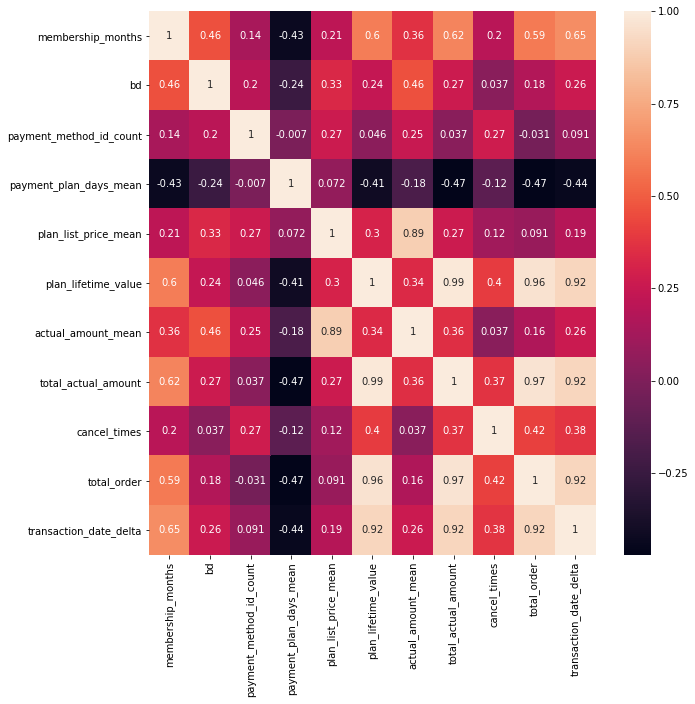

In [69]:
import seaborn as sns

# calculate the correlation matrix using spearman as some of the distributions are not normal.
df_corr = data_prepared[[
                     'membership_months', 'bd', 'payment_method_id_count',\
                     'payment_plan_days_mean', 'plan_list_price_mean', 'plan_lifetime_value',\
                     'actual_amount_mean', 'total_actual_amount',\
                     'cancel_times', 'total_order',\
                     'transaction_date_delta']]\
                .corr('spearman')

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True)

    total_actual_amount and plan_lifetime_value are near perfectly correlated. 
    transaction_date_min is highly correlated with a number of variables also
    actual_amount_mean is highly correlated with plan_list_price_mean

### Might need to remove total_actual_amount as it's highly correlated with other features

In [70]:
# Removing 
#     , 'total_actual_amount'
#     , 'plan_list_price_mean'

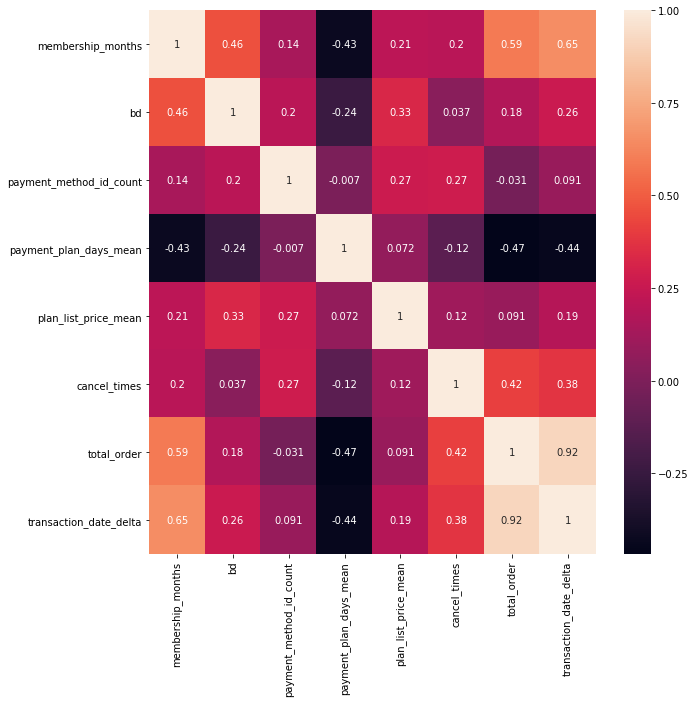

In [71]:
# calculate the correlation matrix using spearman as some of the distributions are not normal.
df_corr = data_prepared[[
                     'membership_months', 'bd', 'payment_method_id_count',\
                     'payment_plan_days_mean', 'plan_list_price_mean', \
                     #'actual_amount_mean', 'total_actual_amount', 'plan_lifetime_value',\
                     'cancel_times', 'total_order',\
                     'transaction_date_delta']]\
                .corr('spearman')

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True)

## Write out the modified dataset to the HDF5 store

In [74]:
df = data_prepared.drop(['msno'], axis=1)
target_index = 0
split_ratio = 0.7
r_state = 42

## Finally generate the train-test splits
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,target_index+1:], 
                                                    df.iloc[:,target_index],
                                                    train_size=split_ratio, 
                                                    stratify=df.iloc[:,target_index],
                                                    random_state = r_state)

In [75]:
store = pd.HDFStore('/home/dissertation/data/feat_eng_abt_split.h5')
store['X_train'] = X_train   # write to HDF5
store['X_test'] = X_test   # write to HDF5
store['y_train'] = y_train   # write to HDF5
store['y_test'] = y_test   # write to HDF5
store.close()